start
end


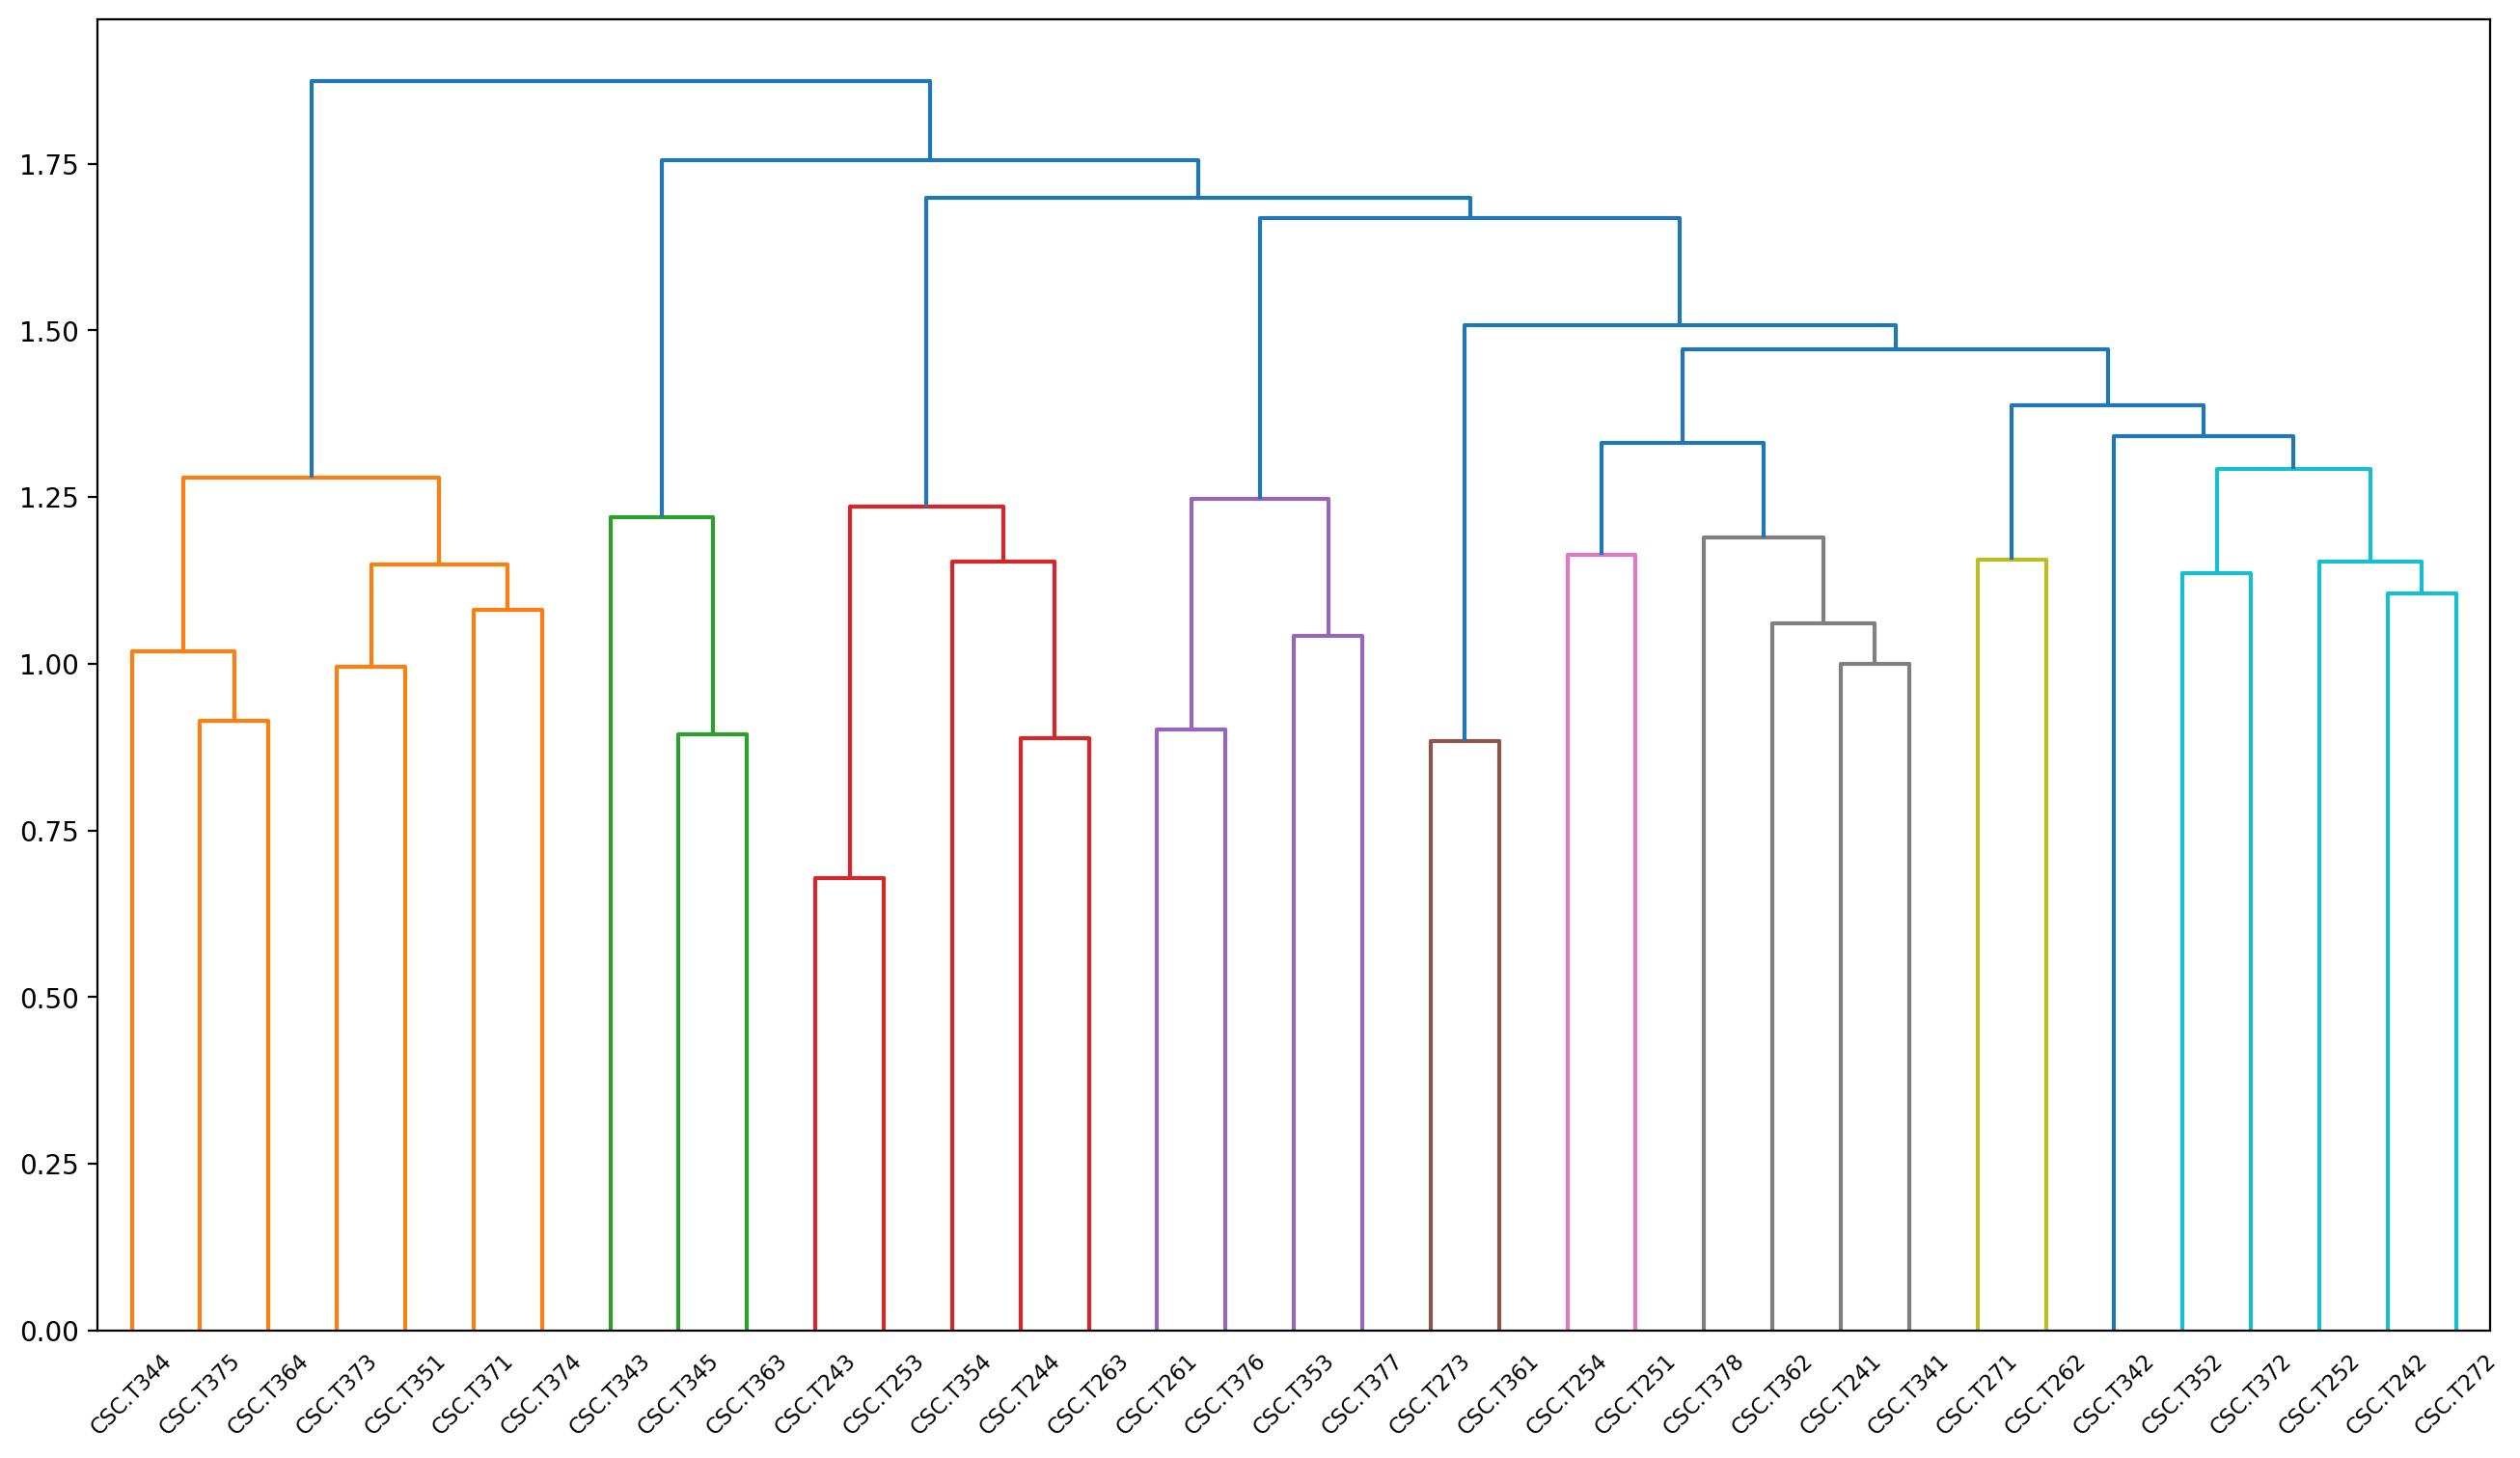

'\nfor doc, cls in zip(paths.keys(), gmm):\n    sub=getname.GetNameJ(doc)\n    print(cls, sub)\n    \n    if getname.GetNameJ(doc) is None:\n        continue\n    \n    lis.append((cls, sub))\n    \nlis.sort()\nprint(lis)\n'

In [1]:
import json
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
docs=[]
path_open = open('path_clusteringJK.json', 'r')
paths = json.load(path_open)
for path in paths.values():
    df = pd.read_csv(path)
    #print(df.columns)
    #print(df['原型'])
    words = " ".join(str(df['原型']))
    docs.append(words)
vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')
vecs = vectorizer.fit_transform(docs)
from sklearn import mixture, cluster
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
#from sklearn.cluster import AffinityPropagation
#from sklearn.mixture import BayesianGaussianMixture 
import getname
#from sklearn.cluster import MeanShift
import hierarchy_cluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
print('start')
#bgm=BayesianGaussianMixture(n_components=10).fit_predict(vecs.toarray())
#gmm=mixture.bgm
#gmm = mixture.BayesianGaussianMixture(n_components=30).fit_predict(vecs.toarray())
#gmm = AffinityPropagation(random_state=0).fit_predict(vecs.toarray())  #最初の４文書をクラスタリング
#clustering = MeanShift().fit(vecs.toarray())
#gmm=clustering.labels_

df = pd.DataFrame(vecs.toarray(),columns=vectorizer.get_feature_names())
df["subject"]=list(paths.keys())
df = df.set_index("subject")
gmm=hierarchy_cluster.hierarchy_cluster(df)

print('end')
lis = []
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(gmm,labels=df.index)
plt.show()
'''
for doc, cls in zip(paths.keys(), gmm):
    sub=getname.GetNameJ(doc)
    print(cls, sub)
    
    if getname.GetNameJ(doc) is None:
        continue
    
    lis.append((cls, sub))
    
lis.sort()
print(lis)
'''

In [2]:
print(gmm)
clusters = fcluster(gmm, t=7, criterion='maxclust')
for i, c in enumerate(clusters):
    print(i, c)
#print(enumerate(clusters))

[[ 7.         12.          0.67860919  2.        ]
 [ 5.         31.          0.88437947  2.        ]
 [ 8.         10.          0.88843228  2.        ]
 [15.         17.          0.89406976  2.        ]
 [13.         34.          0.90113325  2.        ]
 [21.         24.          0.91494091  2.        ]
 [19.         27.          0.99538406  2.        ]
 [ 3.         22.          0.99996923  2.        ]
 [14.         40.          1.01799377  3.        ]
 [28.         32.          1.0415204   2.        ]
 [20.         42.          1.06010809  3.        ]
 [18.         26.          1.08013014  2.        ]
 [ 1.          6.          1.10594483  2.        ]
 [23.         30.          1.13634807  2.        ]
 [41.         46.          1.1487463   4.        ]
 [ 9.         47.          1.15287778  3.        ]
 [29.         37.          1.15315371  3.        ]
 [ 4.         11.          1.15594393  2.        ]
 [ 0.          2.          1.16353549  2.        ]
 [33.         45.          1.18

In [3]:
print(len(clusters))
from getname import GetNameJ
for doc, cls in zip(paths.keys(), clusters):
    lis.append((cls, GetNameJ(doc)))
    print(cls, GetNameJ(doc))


35
6 機械学習
7 確率論・統計学
6 オートマトンと形式言語
6 計算基礎論
7 データ構造とアルゴリズム
5 オブジェクト指向プログラミング
7 人工知能
3 手続き型プログラミング基礎
3 プログラミング創造演習
7 論理回路理論
3 関数型プログラミング基礎
7 アセンブリ言語
3 手続き型プログラミング発展
4 情報論理
1 システムプログラミング
2 コンピュータネットワーク
2 データベース
2 コンピュータアーキテクチャ
1 システムソフトウェア
1 動的システム
6 数値計算法
1 システム構築演習
6 コンピュータ論理設計
7 パターン認識
1 システム設計演習
7 問題解決と意思決定
1 システム制御
1 システム解析
4 生命情報解析
3 並列プログラミング
7 コンパイラ構成
5 オブジェクト指向設計
4 情報工学英語プレゼンテーション
6 チーム開発集中演習基礎
4 先端情報工学


In [4]:
lis.sort()
print(lis)

[(1, 'システムソフトウェア'), (1, 'システムプログラミング'), (1, 'システム制御'), (1, 'システム構築演習'), (1, 'システム解析'), (1, 'システム設計演習'), (1, '動的システム'), (2, 'コンピュータアーキテクチャ'), (2, 'コンピュータネットワーク'), (2, 'データベース'), (3, 'プログラミング創造演習'), (3, '並列プログラミング'), (3, '手続き型プログラミング基礎'), (3, '手続き型プログラミング発展'), (3, '関数型プログラミング基礎'), (4, '先端情報工学'), (4, '情報工学英語プレゼンテーション'), (4, '情報論理'), (4, '生命情報解析'), (5, 'オブジェクト指向プログラミング'), (5, 'オブジェクト指向設計'), (6, 'オートマトンと形式言語'), (6, 'コンピュータ論理設計'), (6, 'チーム開発集中演習基礎'), (6, '数値計算法'), (6, '機械学習'), (6, '計算基礎論'), (7, 'アセンブリ言語'), (7, 'コンパイラ構成'), (7, 'データ構造とアルゴリズム'), (7, 'パターン認識'), (7, '人工知能'), (7, '問題解決と意思決定'), (7, '確率論・統計学'), (7, '論理回路理論')]


In [5]:
import getscore
print(clusters)
print(len(paths.keys()))
print(len(clusters))
print(clusters.tolist())
#print(getscore.GetScoreClus(paths.keys(),clusters))
from getname import GetRelaSub
print(GetRelaSub('CSC.T254'))

[6 7 6 6 7 5 7 3 3 7 3 7 3 4 1 2 2 2 1 1 6 1 6 7 1 7 1 1 4 3 7 5 4 6 4]
35
35
[6, 7, 6, 6, 7, 5, 7, 3, 3, 7, 3, 7, 3, 4, 1, 2, 2, 2, 1, 1, 6, 1, 6, 7, 1, 7, 1, 1, 4, 3, 7, 5, 4, 6, 4]
c
a
b
CSC.T254
['CSC.T242', 'CSC.T272', 'CSC.T243', 'CSC.T253', 'CSC.T352', 'ART.T458']


In [7]:
import getname
score=0
for doc, cls in zip(paths.keys(), clusters):
    print(clusters.tolist())
    print(doc)
    num=clusters.tolist().count(cls)
    print(num)
    lis=getname.GetRelaSub(doc)
    lis2=[]
    for doc2, cls2 in zip(paths.keys(), clusters):
        if cls2==cls:
            lis2.append(doc2)
    score+=len(set(lis2)&set(lis))/num
    print("lis2="+lis2)
    print("lis="+lis)
    print("score="+score)
score/=len(clusters)

[6, 7, 6, 6, 7, 5, 7, 3, 3, 7, 3, 7, 3, 4, 1, 2, 2, 2, 1, 1, 6, 1, 6, 7, 1, 7, 1, 1, 4, 3, 7, 5, 4, 6, 4]
CSC.T254
6
c
a
b
CSC.T254


TypeError: can only concatenate str (not "list") to str